In [1]:
from konlpy.tag import Hannanum
from pprint import pprint
import nltk

# Vector space model
- 문서를 bag-of-model로 표현해 보자.
- 표현된 bag-of-model로 간단한 머신러닝 알고리즘을 적용해보자
- TF-IDF를 통해 중요한 단어를 추출해보자.

In [2]:
# 헌법재판소 최종판결문을 이용하여 tf vector 만들어보기
doc = open('data/final_announcement_for_Park.txt', 'r', encoding='utf-8').read()

print(doc)

지금부터 2016헌나1 대통령 박근혜 탄핵사건에 대한 선고를 시작하겠습니다.

선고에 앞서 이 사건의 진행경과에 관하여 말씀드리겠습니다.

저희 재판관들은 지난 90여일 동안 이 사건을 공정하고 신속하게 해결하기 위하여 온 힘을 다하여 왔습니다. 지금까지 대한민국 국민들께서도 많은 번민과 고뇌의 시간을 보내셨으리라 생각합니다.

저희 재판관들은 이 사건이 재판소에 접수된 지난 해 12. 9. 이후 오늘까지 휴일을 제외한 60여일 간 매일 재판관 평의를 진행하였습니다. 재판과정 중 이루어진 모든 진행 및 결정에 재판관 전원의 논의를 거치지 않은 사항은 없습니다.

저희는 그간 3차례의 준비기일과 17차례에 걸친 변론기일을 열어 청구인측 증거인 갑 제174호증에 이르는 서증과 열두 명의 증인, 5건의 문서송부촉탁결정 및 1건의 사실조회결정, 피청구인측 증거인을 제60호증에 이르는 서증과 열일곱 명의 증인(안종범 중복하면 17명), 6건의 문서송부촉탁결정 및 68건의 사실조회결정을 통한 증거조사를 하였으며 소추위원과 양쪽 대리인들의 변론을 경청하였습니다.

증거조사된 자료는 48,000여쪽에 달하며, 당사자 이외의 분들이 제출한 탄원서 등의 자료들도 40박스의 분량에 이릅니다.

대한민국 국민 모두 아시다시피, 헌법은 대통령을 포함한 모든 국가기관의 존립근거이고, 국민은 그러한 헌법을 만들어 내는 힘의 원천입니다. 재판부는 이 점을 깊이 인식하면서, 역사의 법정 앞에 서게 된 당사자의 심정으로 이 선고에 임하려 합니다. 저희 재판부는 국민들로부터 부여받은 권한에 따라 이루어지는 오늘의 선고가 더 이상의 국론분열과 혼란이 종식되기를 바랍니다. 또한, 어떤 경우에도 법치주의는 흔들려서는 안 될 우리 모두가 함께 지켜 가야 할 가치라고 생각합니다.

지금부터 선고를 시작하겠습니다.

먼저, 이 사건 탄핵소추안의 가결절차와 관련하여 흠결이 있는지 살펴보겠습니다.

소추의결서에 기재된 소추사실이 구체적으로 특정되지 아니하였다는 점에 대하여 보겠습니다. 헌법상 탄핵소추사유는,

In [3]:
# Hannanum package
pos_tagger = Hannanum()

# list comprehension, for loop가 빨라짐, 간결한 표현
pos = ['/'.join(t) for t in pos_tagger.pos(doc)] # 형태소로 tokenizing

# 뉴스를 tokenizing한 후, 명사만 추출
pos_nouns = ['/'.join(t) for t in pos_tagger.pos(doc) if t[1]=='N']

# list 원소 중 10개를 살펴보기
pprint(pos[0:10])

# list 원소 모두 출력
pprint(pos_nouns[0:10])

['지금/N',
 '부터/J',
 '2016헌나1/N',
 '대통령/N',
 '박근혜/N',
 '탄핵사건/N',
 '에/J',
 '대하/P',
 'ㄴ/E',
 '선고/N']
['지금/N',
 '2016헌나1/N',
 '대통령/N',
 '박근혜/N',
 '탄핵사건/N',
 '선고/N',
 '시작/N',
 '선고/N',
 '사건/N',
 '진행경과/N']


In [4]:
# 형태소 분석과 전처리 과정만 끝난다면 nltk와 scikit learn을 예전과 동일한 방법으로 사용할 수 있습니다.

# Text() - 단일 문서에 대한 탐색에 좋은 함수가 내장
text = nltk.Text(pos) # 형태소 분석이 된 list를 input으로 넣어주면

print("문서에 나온 토큰 수: ", len(text.tokens)) # 문서에서 나온 token 수
print("문서에 나온 토큰 종류 수:  ", len(set(text.tokens))) # 겹치지 않는 token 개수
pprint(text.vocab().most_common(20)) # 가장 빈번히 나온 token 나열

문서에 나온 토큰 수:  3321
문서에 나온 토큰 종류 수:   867
[('하/X', 145),
 ('이/J', 120),
 ('ㄴ/E', 107),
 ('의/J', 103),
 ('./S', 100),
 ('을/J', 99),
 ('어/E', 83),
 ('에/J', 83),
 (',/S', 64),
 ('를/J', 55),
 ('하/P', 53),
 ('은/J', 53),
 ('피청구인/N', 45),
 ('는/J', 36),
 ('ㄹ/E', 35),
 ('되/X', 33),
 ('는/E', 32),
 ('과/J', 29),
 ('었습니다/E', 27),
 ('가/J', 27)]


In [5]:
# font 문제가 있다면 먼저 실행
from matplotlib import font_manager, rc
# font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

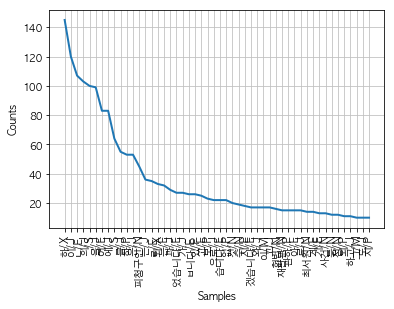

In [6]:
# 빈도 기준으로 token plot - distribution확인
text.plot(50)

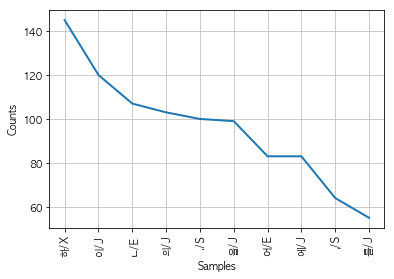

In [7]:
# FreqDist 함수로도 같은 기능을 수행할 수 있다.
freq = nltk.FreqDist(text)
freq['것/Noun']
freq.most_common(10)
freq.plot(10)

<h3> TF-IDF 벡터 만들기</h3>
- TF 벡터와 TF-IDF 벡터는 scikit learn(http://scikit-learn.org/)을 통해 계산할 수 있다.

In [8]:
### 한글 bag-of-words 만들어보자
from konlpy.tag import Twitter
import pandas as pd

## 연합뉴스 로딩

kor_corpus = pd.read_csv('data/news_koreanwave.csv', encoding='utf-8')

## Twitter 형태소 분석기를 이용한 뉴스기사 정제
pos_tagger = Twitter()

# 한글 문서 명사만 뽑아서 tf-idf
stopword = ['것','수','저']
total_news = []
for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [9]:
kor_corpus.head()

time                            title  \
0  2016/08/09 16:44        에스테틱 미용 시장 개척하는 광주 노아 메디컬   
1  2016/08/09 15:37  청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원   
2  2016/08/09 15:32          고신대병원, 카자흐스탄에 두 번째 거점센터   
3  2016/08/09 15:19              국제패션문화페스티벌 자원봉사자 모집   
4  2016/08/09 14:42  "中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야"   

                                            contents  
0  (광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...  
1  (구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...  
2  (부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...  
3   (대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...  
4  (세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...

In [10]:
len(kor_corpus)

2590

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력

In [13]:
print(kor_bow)

  (0, 101)	1
  (0, 336)	1
  (0, 209)	1
  (0, 157)	1
  (0, 36)	1
  (0, 136)	1
  (0, 143)	1
  (0, 18)	1
  (0, 274)	1
  (0, 302)	1
  (0, 177)	1
  (0, 70)	1
  (0, 344)	1
  (0, 79)	1
  (0, 69)	1
  (0, 205)	1
  (0, 227)	1
  (0, 114)	1
  (0, 235)	1
  (0, 150)	1
  (0, 246)	1
  (0, 54)	2
  (0, 265)	1
  (0, 314)	1
  (0, 158)	1
  :	:
  (4, 103)	1
  (4, 211)	2
  (4, 335)	5
  (4, 343)	3
  (4, 299)	1
  (4, 115)	1
  (4, 142)	1
  (4, 2)	1
  (4, 129)	2
  (4, 339)	1
  (4, 101)	7
  (4, 336)	5
  (4, 36)	1
  (4, 274)	11
  (4, 151)	1
  (4, 27)	1
  (4, 232)	1
  (4, 117)	1
  (4, 126)	1
  (4, 50)	1
  (4, 263)	1
  (4, 173)	1
  (4, 132)	1
  (4, 53)	1
  (4, 204)	2


In [14]:
print(kor_vectorizer.get_feature_names())
# bag-of-words
print(kor_bow.shape)
print(kor_bow.toarray())

['가수', '가요', '각각', '개정', '개척', '거점', '건강', '검진', '견실', '견지해', '결정', '경북', '경연', '경우', '경운대', '경쟁', '경제', '경향', '계획', '고고', '고신대', '공간', '공공', '공연장', '공유', '과거', '관계자', '관련', '광부', '광주', '교류', '교육', '교육감', '구미', '구미시장', '구축', '국내', '국립병원', '국민', '국악', '국제', '권정열', '규모', '그룹', '극장', '극히', '근무', '금은', '기기', '기도', '기사', '기술', '기업', '기자', '기존', '기타', '기획', '김영만', '김태우', '끼리', '나라', '날로', '내년', '내달', '내용', '노래', '노아', '누구', '눈길', '능이', '다음', '다이어트', '단일', '당일', '대구', '대부분', '대상', '대중', '대표', '대학', '대한', '대해', '댄스', '더욱', '도시', '도움', '도지사', '독소', '동상', '드림', '등록', '디자이너', '디자인', '라며', '라피', '리밍', '만원', '메시지', '몽골', '문의', '문전', '문화', '물리', '미래', '미사일', '미용', '민간', '박대', '박순', '박창수', '반복', '반응', '발굴', '발급', '발생', '발전', '방어', '배너', '배치', '번역', '베트남', '병원', '보도', '보유', '복부', '복음병원', '본문', '본선', '봉사', '부문', '부분', '부산', '분야', '분위기', '분해', '브랜드', '브리핑', '사드', '사립', '사무국', '사업', '사흘', '산업', '상의', '상표', '생각', '생산', '생소', '서로', '서울', '석션기', '선도', '선발', '설명', '성공', '성분', '성인', '세계', '세라믹', '세종', '센터', '

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [16]:
tfidf.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.06236855,
         0.        ,  0.06236855],
       [ 0.07572825,  0.1514565 ,  0.06109707, ...,  0.        ,
         0.07572825,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.05084439, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
# 간단한 예제

ex_text = ["한국 김치 ",
          "한국 미국 FTA FTA ",
          "한국 미국 "]

kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(ex_text)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())
print(kor_vectorizer.get_feature_names())
print(kor_bow.toarray())
print(tfidf.toarray())


['fta', '김치', '미국', '한국']
[[0 1 0 1]
 [2 0 1 1]
 [0 0 1 1]]
[[ 0.          0.861037    0.          0.50854232]
 [ 0.90100815  0.          0.34261996  0.26607496]
 [ 0.          0.          0.78980693  0.61335554]]


<h3> 워드 클라우드 TF  v.s. TF IDF</h3>

In [18]:
# pip install wordcloud
from wordcloud import WordCloud

In [19]:
wordcloud = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf")

In [20]:
yonhap = kor_corpus['contents']

In [21]:
# 200개만 사용
kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(yonhap[:200])
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [22]:
yonhap[10]

'(서울=연합뉴스) 구정모 기자 = 사드(THAAD·고고도 미사일 방어체계) 배치 결정 이후 중국이 한류 확산에 제동을 걸고 나선 것이 아니냐는 우려가 이는 가운데 아직 영화 분야에서는 \'수상한\' 흐름이 감지되고 있지 않은 것으로 나타났다. 대부분 합작 형태로 중국 감독이 연출하고 중국 배우가 출연하는 영화를 제작 중이어서 직접적인 제재권에서 벗어나 있는 환경이긴 하지만 반한류 움직임이 어느 정도의 강도로, 얼마나 이어질지 예상할 수 없다는 점에서 우리 영화업계는 중국 내 상황변화에 촉각을 곤두세우고 있다. 9일 영화업계에 따르면 국내 주요 배급업체 중 중국에 가장 먼저 진출한 CJ E&M은 중국과의 공동제작 활동을 왕성히 벌이고 있다. 전체기사 본문배너 김진아 감독이 연출하고 배우 양자경이 주연을 맡은 \'파이널 레시피\'가 이달 말 개봉을 앞두고 있고, \'베테랑\'과 \'장수상회\' 등 국내 영화의 리메이크 작품도 중국 측과 공동제작 방식으로 진행되고 있다. 앞서 CJ E&M은 국내에서 흥행을 거둔 영화를 중국 정서에 맞게 리메이크하는 전략으로 재미를 톡톡히 본 바 있다. \'수상한 그녀\'를 중국판으로 리메이크한 \'20세여, 다시 한 번\'이 지난해 1월 중국에서 개봉해 관객 1천162만명을 끌어모아 3억6천500만 위안(약 640억원)의 흥행 수익을 올렸다. CJ E&M 관계자는 "중국에서 공식적이고 가시적인 조치가 나온 상황이 아니어서 대비책을 세우기에 모호한 측면이 있다"며 "중국 상황을 예의주시하면서 프로젝트를 진행하고 있다"고 말했다. 쇼박스는 지난해 중국의 대표적인 제작사인 화이브라더스와 함께 \'쇼박스차이나\'를 설립해 3년간 한중합작영화 6편을 제작하기로 했다. 그 첫 결실인 \'뷰티풀 액시던트\'(美好的意外·미호적의외)가 하반기 개봉할 예정이다. 쇼박스 관계자는 "우리가 만드는 영화는 감독과 배우, 제작 모두 중국인이다"며 "겉의 만듦새가 100% 중국이라서 사드의 영향을 받지 않을 것"이라고 예상했다. 쇼박스 측은 화이 측과 2번

In [28]:
# wordcloud 용 데이터 형태로 변환
word_tf = zip(kor_vectorizer.get_feature_names(),kor_bow.toarray()[10])

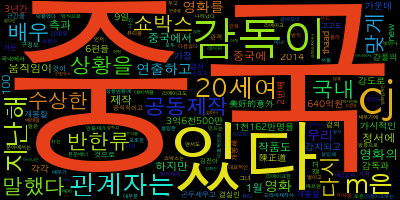

In [29]:
wordcloud.generate_from_frequencies(word_tf).to_image()

In [25]:
word_tfidf = zip(kor_vectorizer.get_feature_names(),tfidf.toarray()[10])

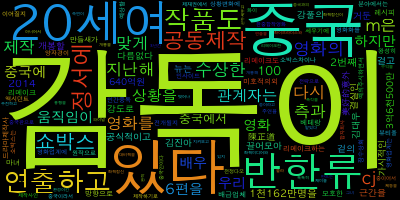

In [26]:
wordcloud.generate_from_frequencies(word_tfidf).to_image()

<h3> 연어(collocation) 예제</h3>

In [27]:
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations
from konlpy.tag import Kkma

measures = collocations.BigramAssocMeasures()
doc = open('data/final_announcement_for_Park.txt', 'r',).read()
print('\nCollocations among tagged words:')

tagged_words = Kkma().pos(doc)
finder = collocations.BigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 10 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.BigramCollocationFinder.from_words(words)

finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tagged words:
[(('40', 'NR'), ('박스', 'NNG')),
 (('48,000', 'NR'), ('여', 'NNG')),
 (('[', 'SS'), ('생략', 'NNG')),
 (('ㅁ', 'ETN'), ('으로써', 'JKM')),
 (('간', 'NNG'), ('매일', 'NNG')),
 (('감시', 'NNG'), ('장치', 'NNG')),
 (('거점', 'NNG'), ('체육인', 'NNG')),
 (('공익', 'NNG'), ('실현', 'NNG')),
 (('구속', 'NNG'), ('기소', 'NNG')),
 (('국기', 'NNG'), ('문란', 'NNG'))]

Collocations among words:
[('생명권', '보호'),
 ('체육', '관광'),
 ('위기', '상황'),
 ('재단', '법인'),
 ('플레이', '그라운드'),
 ('문화', '체육'),
 ('청구', '인의'),
 ('케이', '스포츠'),
 ('이나', '법률'),
 ('직책', '수행')]

Collocations among tags:
[('XR', 'XSA'), ('JKC', 'VCN'), ('NR', 'NNM'), ('SS', 'SS'), ('EPH', 'EPT')]


<h3> 유사 문서 검색 </h3>

In [30]:
import re

total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news) # 한 기자가 많은 기사를 작성. 기자명 때문에 유사한 것으로 계산될 수 있으니 이를 제거하자
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [31]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
cosine_similarity(kor_bow[0], kor_bow)

array([[ 1.        ,  0.11375002,  0.05443311,  0.06488857,  0.15278266,
         0.10169504,  0.07067463,  0.17142067,  0.04170288,  0.09312404,
         0.10893319,  0.07647607,  0.05025189,  0.1030303 ,  0.05907646,
         0.10210625,  0.13245324,  0.22749346,  0.17622809,  0.06626221,
         0.0710478 ,  0.41344057,  0.12479613,  0.07873409,  0.07336607,
         0.09089031,  0.06081303,  0.12177236,  0.10302232,  0.11231009,
         0.06101546,  0.12175234,  0.04912836,  0.05634362,  0.06740802,
         0.09136021,  0.09740095,  0.13225059,  0.05994742,  0.0713624 ,
         0.13535101,  0.03823596,  0.08970628,  0.1069611 ,  0.1164848 ,
         0.17960051,  0.13149863,  0.11715032,  0.08504201,  0.10606602,
         0.07638263,  0.09117943,  0.12916591,  0.12520804,  0.07662204,
         0.10737427,  0.06344892,  0.20050049,  0.08568485,  0.09751896,
         0.0942809 ,  0.11769166,  0.10010242,  0.09052239,  0.08119979,
         0.11369851,  0.09547299,  0.15830396,  0.1

In [34]:
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0 604  21 503 883 172 498 196 440 416 552 877 895 685 393 264  69 740
 309 671 222 287 723 770  71 917  91 187 737 272 628 463 680 733 487 594
 768 765 232 369 349 243 800 553 267 305 271 427 506 525 665 933  17 712
 891 261 417 806 964  97 587 849 970 471 160 203 280 676 682 753 497 850
 747 585 551 642 228 386 161 268 363 283 558 785 661 713  57 675 457 629
 154 382 906 554 511 320 719 184 687 175 492 724 876 926 273 201 826 882
 958 759 938 957 355  45 360 752 426 389 582 242 677 911  18 147 617 218
 567 379 973 887 447 255 337 931   7 951 405 584 784 215 779 269 491 997
 475 916 907 708 634 884 178 881 202 144 496 683 641 177 181 515 942 560
 460 306 352 912 129 343 871 855  67 472  85 946 376 944 104  99 354   4
 975 913 489 788 109 532 346 798 149 864 189 711 336 643 152 134 115 890
 994 456 857 230 125 302 490 290 928 274 823 974 420 561 356 845 778 763
 289 648 969 399 388 128 136  94  74 971 419 742 236 624 610 167  40 213
 725 477 185 614 512 573 529 378 135 480  16  89  3

In [35]:
# idx에서 자기 자신을 뺀 두번째 index 즉 idx[1] 리턴! // 이전까지는 intuition
def find_most_similar_news(index, bow, corpus):
    idx = (-cosine_similarity(bow[index], bow)[0]).argsort()[1]
    return corpus[idx]

In [36]:
# 이제부터 시작!
idx = 300

In [37]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [38]:
find_most_similar_news(idx, kor_bow, yonhap) # Query를 제외하고 가장 유사한 문서, 북한이라는 키워드는 없다

'(서울=연합뉴스) 조민정 기자 = "준, 앞을 봐야 하지 않아?" 운전하면서도 조수석에 앉은 자신을 쳐다보며 이야기를 이어가는 남자 주인공에게 타박이 날아든다. 박준이라는 이름의 이 남자 주인공은 재벌 2세. 회사를 물려받는 대신 레스토랑을 연 셰프다. 레스토랑의 여자 매니저는 그와 그의 재산을 탐내며 곁을 맴돌고 부주방장 서연은 그를 짝사랑한다. 전체기사 본문배너 한국 드라마에 빠진 한 백인 소녀가 가상의 세계 \'드라마월드\'에 떨어지면서 벌어지는 이야기를 담은 이 드라마는 곳곳에 한국 드라마의 전형적인 설정들을 재치있게 엮어냈다. 지난 1일부터 한국에서도 볼 수 있게 된 이 미국 드라마에서 \'김치싸대기\', 삼겹살과 소주, 욕심 많은 사모님, 노골적인 간접광고(PPL)까지 익숙한 장면들을 찾아보는 재미가 쏠쏠하다. ◇ "저 자동차 로고는 왜 가린 거야?" 주인공 박준(션 리처드 분)이 화가 났다는 것은 그가 상의 탈의를 하고 샤워기 아래서 뜨거운 물을 맞는 장면으로 드러나고, 차를 타고 가다가 화가 났을 땐 길 한가운데서 상대방에게 낮고 굵은 목소리로 "내려. 내리라고"라 한다. 준의 어머니는 아들이 회사를 이었으면 하는 바람으로 사사건건 간섭을 한다. 그런 그녀 옆에는 \'예비 며느리\'를 자처하는 여자가 있는데, 물론 악녀다. 여주인공 서연(배누리)은 설거지 담당부터 시작해 뛰어난 실력과 미모로 준의 마음을 사로잡아 그를 바로 옆에서 보조하게 됐다. 순수하고 남자를 일부러 꼬시는 일 따위는 할 줄 모른다. 준의 아버지가 운영하던 회사인 \'서리꽃\'의 제품들은 시도 때도 없이 등장해 클로즈업되는 반면, 준이 탄 자동차의 로고는 가려져 있다. 한국 드라마에 과도하게 등장하는 간접광고(PPL)에 대한 패러디다. 급기야 아침 드라마에서 등장해 한동안 화제가 됐던 \'김치 싸대기\' 장면도 \'깨알같이\' 패러디됐다. 누구나 \'뻔하다\'고 생각할만한 설정들을 보란 듯이 노골적으로 드러내 한국 드라마를 단 몇 번이라도 본 사람이라면 피식피식 웃음이 새어 

<h4> TF IDF weighting을 사용하면 더 정확하게 유사한 문서를 찾을 수 있다 </h4>

In [39]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [40]:
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

In [41]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [42]:
# 가운데 일치하는 내용이 있다!!!!!!!! 좋은 예시입니다.
find_most_similar_news_idf(idx, tfidf, yonhap)

'(하노이=연합뉴스) 김문성 특파원 = 배정호 민주평화통일자문회의 사무처장은 27일 "북한의 전통적인 우방국이자 여전히 정치, 경제, 군사적 교류를 이어가는 베트남의 대북제재 이행은 북한의 태도변화에 큰 전환점이 될 수 있다"며 베트남의 적극적인 제재 동참을 촉구했다. 배 사무처장은 이날 베트남 하노이 롯데호텔에서 민주평통 주최로 열린 \'2016 한·베트남 평화통일포럼\'에서 기조연설을 통해 "유엔 제재가 빈틈없이 이행되도록 한국과 베트남이 적극적으로 협력하는 것이 무엇보다 필요하다"고 강조했다. 그는 "2014년 북한과 베트남이 500만 달러(57억 원)의 투자와 교역을 진행했고 베트남에 북한 식당도 운영되고 있다"며 북한의 돈줄을 죄고 비핵화를 이루는데 베트남의 협력을 요청했다. 전체기사 본문배너 강동완 동아대 교수는 \'한류가 북한사회에 미치는 영향\'이란 주제 발표에서 "최근 북한 내부에서 남한 영화나 드라마가 인기를 누리면서 한류 현상이 확산하고 있다"며 "이는 단순히 한류 전파라는 점 이외에 폐쇄된 북한 체제에 자본주의 요소인 시장을 확대하는 매개체"라고 평가했다. 강 교수는 "시장이 단순히 물물거래의 기능보다는 정보가 유통되고 북한사회의 폐쇄성을 상쇄하는 기능을 지니게 됐다"며 "남한 영상 매체의 확산은 북한에서 지역·계층 간 경계 허물기라는 사회적 현상의 변화를 초래하고 있다"고 말했다. 강 교수는 북한 주민의 남한 영상 매체 시청이 북한 체제 변화를 촉구하는 다른 요인과 상호 결합할 경우 북한사회 전체를 움직일 수 있을 기폭제가 될 것으로 전망했다. 딘 꽝 하이 베트남 역사연구소장은 베트남이 1975년 남북통일 이후 중앙에서 지방까지 집중적이고 일관된 정치, 문화, 사회, 경제 통합을 추진했다고 소개하며 전쟁 상흔 치료, 민족 화합과 화해, 미래를 위해 승자와 패자라는 이분법식 인식과 과거 상처에 얽매여서는 안 된다고 지적했다.'

</h4> TF IDF scheme을 활용하여, 유사한 문서끼리 묶어보자 </h4>

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters = 5, n_init = 50, verbose=1)

In [46]:
kmeans.fit(tfidf)

Initialization complete
Iteration  0, inertia 1760.623
Iteration  1, inertia 923.794
Iteration  2, inertia 917.370
Iteration  3, inertia 915.424
Iteration  4, inertia 914.462
Iteration  5, inertia 914.067
Iteration  6, inertia 913.829
Iteration  7, inertia 913.765
Iteration  8, inertia 913.685
Iteration  9, inertia 913.633
Iteration 10, inertia 913.525
Iteration 11, inertia 913.397
Iteration 12, inertia 913.248
Iteration 13, inertia 913.200
Iteration 14, inertia 913.182
Iteration 15, inertia 913.157
Iteration 16, inertia 913.126
Converged at iteration 16: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1744.501
Iteration  1, inertia 927.464
Iteration  2, inertia 921.276
Iteration  3, inertia 914.666
Iteration  4, inertia 909.998
Iteration  5, inertia 908.759
Iteration  6, inertia 908.149
Iteration  7, inertia 907.922
Iteration  8, inertia 907.778
Iteration  9, inertia 907.696
Iteration 10, inertia 907.638
Iteration 11, inertia 907.5

Iteration 26, inertia 912.130
Iteration 27, inertia 912.084
Iteration 28, inertia 912.044
Iteration 29, inertia 912.035
Converged at iteration 29: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1753.035
Iteration  1, inertia 923.923
Iteration  2, inertia 918.688
Iteration  3, inertia 916.765
Iteration  4, inertia 915.716
Iteration  5, inertia 914.958
Iteration  6, inertia 914.586
Iteration  7, inertia 914.131
Iteration  8, inertia 913.464
Iteration  9, inertia 913.266
Iteration 10, inertia 913.119
Iteration 11, inertia 912.612
Iteration 12, inertia 912.239
Iteration 13, inertia 912.096
Iteration 14, inertia 911.976
Iteration 15, inertia 911.911
Iteration 16, inertia 911.871
Iteration 17, inertia 911.847
Converged at iteration 17: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1746.364
Iteration  1, inertia 928.271
Iteration  2, inertia 923.571
Iteration  3, inertia 921.863
Iter

Iteration 15, inertia 915.519
Iteration 16, inertia 915.476
Iteration 17, inertia 915.435
Iteration 18, inertia 915.407
Iteration 19, inertia 915.389
Converged at iteration 19: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1733.931
Iteration  1, inertia 923.368
Iteration  2, inertia 918.883
Iteration  3, inertia 917.024
Iteration  4, inertia 916.515
Iteration  5, inertia 916.043
Iteration  6, inertia 915.681
Iteration  7, inertia 915.501
Iteration  8, inertia 915.334
Iteration  9, inertia 915.235
Iteration 10, inertia 915.138
Iteration 11, inertia 915.073
Iteration 12, inertia 915.030
Iteration 13, inertia 915.012
Iteration 14, inertia 914.996
Iteration 15, inertia 914.977
Iteration 16, inertia 914.969
Converged at iteration 16: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1719.315
Iteration  1, inertia 924.601
Iteration  2, inertia 918.529
Iteration  3, inertia 916.774
Iter

Iteration  9, inertia 915.028
Iteration 10, inertia 914.518
Iteration 11, inertia 914.335
Iteration 12, inertia 914.271
Iteration 13, inertia 914.238
Iteration 14, inertia 914.227
Iteration 15, inertia 914.204
Iteration 16, inertia 914.185
Converged at iteration 16: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1794.076
Iteration  1, inertia 929.420
Iteration  2, inertia 922.923
Iteration  3, inertia 919.497
Iteration  4, inertia 917.845
Iteration  5, inertia 917.154
Iteration  6, inertia 916.774
Iteration  7, inertia 916.608
Iteration  8, inertia 916.529
Iteration  9, inertia 916.453
Iteration 10, inertia 916.401
Iteration 11, inertia 916.339
Iteration 12, inertia 916.316
Iteration 13, inertia 916.298
Converged at iteration 13: center shift 0.000000e+00 within tolerance 3.880374e-08
Initialization complete
Iteration  0, inertia 1785.604
Iteration  1, inertia 928.518
Iteration  2, inertia 923.052
Iteration  3, inertia 920.610
Iter

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [47]:
kmeans.labels_

array([3, 4, 4, 4, 1, 1, 1, 3, 2, 2, 1, 4, 4, 1, 4, 1, 3, 3, 3, 2, 4, 3, 4,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 4, 4, 1, 4, 1, 1, 4, 3,
       4, 4, 3, 2, 4, 3, 4, 1, 4, 1, 3, 2, 1, 3, 4, 4, 1, 4, 4, 4, 1, 2, 1,
       3, 1, 1, 4, 1, 4, 2, 4, 4, 2, 3, 0, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 3, 2, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 4, 2, 4, 4, 4, 3,
       4, 4, 3, 2, 2, 4, 4, 2, 4, 2, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 4, 4, 4,
       4, 2, 4, 3, 2, 3, 4, 2, 3, 4, 2, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 2,
       4, 3, 2, 4, 3, 4, 3, 4, 3, 0, 3, 4, 4, 4, 2, 3, 2, 2, 4, 3, 3, 3, 4,
       3, 4, 3, 4, 3, 4, 2, 1, 2, 4, 2, 4, 3, 1, 4, 4, 2, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4,
       4, 2, 2, 2, 4, 2, 4, 3, 2, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 2, 4, 4, 2,
       4, 2,

In [48]:
import numpy as np
clusters = []
for i in range(0, kmeans.n_clusters):
    clusters.append(np.where(kmeans.labels_ == i))

In [48]:
clusters

[(array([  1,   2,   3,  11,  12,  14,  20,  22,  32,  34,  41,  63,  64,
          81,  84,  87,  90,  92,  93,  96,  98, 100, 106, 107, 118, 120,
         123, 128, 129, 130, 131, 133, 134, 135, 136, 138, 139, 142, 143,
         145, 147, 148, 149, 150, 151, 155, 157, 158, 159, 162, 163, 166,
         167, 169, 173, 174, 175, 176, 182, 183, 184, 186, 190, 193, 195,
         199, 200, 204, 207, 210, 212, 214, 218, 219, 220, 225, 229, 231,
         233, 235, 239, 241, 244, 245, 247, 248, 249, 250, 251, 254, 255,
         258, 260, 261, 262, 266, 267, 275, 276, 279, 280, 282, 284, 285,
         286, 291, 292, 293, 296, 297, 299, 303, 307, 308, 310, 311, 315,
         318, 319, 320, 321, 322, 323, 324, 325, 327, 329, 332, 341, 342,
         344, 345, 347, 348, 350, 351, 357, 359, 361, 362, 364, 365, 366,
         368, 371, 374, 375, 376, 379, 380, 381, 382, 383, 388, 390, 391,
         394, 396, 397, 398, 401, 402, 403, 404, 405, 406, 407, 408, 409,
         411, 412, 413, 414, 419, 420,

In [49]:
# 클러스터 몇 개를 살펴보자
print('1번 클러스터')
print(yonhap[1])
print(yonhap[11])
print(yonhap[90])

1번 클러스터
(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '제16회 LG드림페스티벌'이 시작됐다.  LG경북협의회는 내달 4일까지 홈페이지(www.lgcog.co.kr)에서 신청을 받아 9월 10일부터 10월 8일까지 행사를 치른다. 전체기사 본문배너 가요·그룹댄스·국악 등 3개 부문으로 진행해 부분별 대상에 500만원, 금상 300만원, 은상 200만원, 동상 100만원을 수여한다. 총상금은 5천만원이다. LG경북협의회장상과 여성가족부 장관상, 경북도지사상, 경북도교육감상, 구미시장상을 준다. 9세부터 24세까지 누구나 참가할 수 있다. 가요·그룹댄스 부문의 경우 내달 10일 서울지역 예선(서울경향아트힐), 9월 11일 부산지역 예선(부산디자인센터), 9월 24일 구미지역 예선(경운대학교)이 각각 열린다. 10월 1일 본선에서 TOP3 경연팀을 선발한 뒤 10월 8일 구미시민운동장에서 열리는 본 행사에서 대상팀을 선정한다. 국악부문은 9월 25일 구미경운대에서 당일 행사로 진행된다. LG드림페스티벌을 통해 GOD의 김태우, 십센치(10cm)의 권정열, 한류스타 황치열, 팝핀 여제 주민정, 트로트 가수 류원정 등 많은 스타가 발굴됐다고 한다. 자세한 내용은 홈페이지를 참고하거나 사무국(053-381-8071)으로 문의하면 된다.
(서울=연합뉴스) 김태균 기자 = 과잉 규제인가, 남북분단 상황에서 어쩔 수 없는 안보 조처인가. 세계 1위 검색 엔진 구글이 '한국 지도의 국외 반출 규제'란 생소한 주제의 논쟁에 불을 지폈다. 안보 상황 때문에 한국 지도를 외국에 반출하는 것을 엄격히 통제하는 우리 정부의 규제가 'IT 혁신에서 뒤처질 수 있는 조처'라고 반발한 것이다. 전체기사 본문배너 8일 국회에서는 이번 논쟁과 관련해 첫 토론회까지 열렸다. 토론회를 주관한 국회 국토교통위원회의 이우현 의원(국토위 새누리당 간사)은 이날 행사에서 "우리 국민의 소중한 세금으로 만든 지도를 외국 기업에 제공할 때 국익·관련 산업에 어떤 긍정적

<h4> > 한류스타 관련 클러스터라 할 수 있다 </h4>

In [48]:
print('2번 클러스터')
print(yonhap[11])
print("\n")
print(yonhap[14])
print("\n")
print(yonhap[590])

2번 클러스터
(서울=연합뉴스) 김태균 기자 = 과잉 규제인가, 남북분단 상황에서 어쩔 수 없는 안보 조처인가. 세계 1위 검색 엔진 구글이 '한국 지도의 국외 반출 규제'란 생소한 주제의 논쟁에 불을 지폈다. 안보 상황 때문에 한국 지도를 외국에 반출하는 것을 엄격히 통제하는 우리 정부의 규제가 'IT 혁신에서 뒤처질 수 있는 조처'라고 반발한 것이다. 전체기사 본문배너 8일 국회에서는 이번 논쟁과 관련해 첫 토론회까지 열렸다. 토론회를 주관한 국회 국토교통위원회의 이우현 의원(국토위 새누리당 간사)은 이날 행사에서 "우리 국민의 소중한 세금으로 만든 지도를 외국 기업에 제공할 때 국익·관련 산업에 어떤 긍정적 효과가 나타나는지, 분단국가인 한국의 안보에는 어떤 영향을 주는지 검토해야 한다"고 강조했다. 구글은 한국 지도를 국외로 가져가 간판 상품인 구글 지도(구글맵)의 완성도를 높이고 싶어한다. 애초 구글은 미국·칠레·대만 등 한국 바깥의 '글로벌 서버'에 세계 각국의 지도를 가져다 전세계로 서비스하는데 한국의 경우는 정부의 불허로 제대로 된 지도 서비스를 못하고 있다. 우리 정부는 한국 지도를 웬만하면 국내 서버에서 처리하고, 지도가 기업의 외국 서버로 빠져나가면 적대 세력이 쉽게 입수해 안보에 해롭다고 우려하고 있다. 이 때문에 구글은 2008년 한국판 구글맵을 출시하면서 국내에 소규모 서버를 두고 한국 지도를 처리하는 편법을 택했다. 서버가 작은 탓에 한국판 구글맵은 글로벌 서버가 돌리는 다른 나라 구글맵과 비교해 10% 정도의 기능밖에 소화하지 못한다. 내비게이션·도보 길 찾기·실내 지도·3차원 지도 등의 고급 기능이 빠졌고 지도 검색과 대중교통 길 찾기라는 기본 기능만 제공한다. 구글은 지도 반출만 성사되면 한국판 구글맵의 소비자 혜택이 늘어나고 한국 IT 업계에도 신선한 자극이 될 수 있다고 주장한다. 구글 본사의 권범준 매니저는 국회 토론회에서 "구글은 전 세계에서 제공하는 지도 서비스를 다른 나라에서 제공하듯이 한국에서도 제공하고 싶다. 무엇

<h4> > 중국 관련 이슈 </h4>

#### 클러스터 개수를 줄이면 어떻게 될까? 반대로 늘리면

#### 클러스터 갯수를 조금 더 늘려보고 줄여봐서 어떻게 모이는지 확인해 보자!

In [50]:
import gensim


#아래 명령어 실행하시고
def hash32(value):
     return hash(value) & 0xffffffff
    
doc_list = []
for doc in yonhap[:1000]:
    tokens = [t for t in pos_tagger.nouns(doc) if len(t)>1]
    doc_list.append(tokens)


In [51]:
import time
min_count = 1 #2 번 미만으로 나온 단어는 무시하겠다
hidden_size = 50 #corpus 가 적을때는 50, 30 정도만 해도 충분하다, 많으면 100~200
workers = 1 #core 수
window= 3 #corpus가 작으면 window size가 적은게 좋고, 많으면 5~10으로 해도 됨
epoch = 30  #30~50정도

start = time.time()
model_total = gensim.models.Word2Vec(doc_list, window = window, min_count=min_count, size = hidden_size, workers = workers, iter = epoch, seed=1, hashfxn=hash32)

end = time.time()
print(end-start)

10.875770807266235


In [52]:
model_total.most_similar('드라마')

[('대장금', 0.7491415739059448),
 ('영화', 0.6715266704559326),
 ('촬영현장', 0.6674877405166626),
 ('방영', 0.6643099784851074),
 ('일기', 0.6634365320205688),
 ('그대', 0.6552795171737671),
 ('태후', 0.6509160995483398),
 ('해상도', 0.6507033705711365),
 ('데드', 0.649046778678894),
 ('사극', 0.6474745869636536)]

In [53]:
model_total

In [54]:
doc_list

[['광주',
  '연합뉴스',
  '여운',
  '기자',
  '날로',
  '피부',
  '미용',
  '분야',
  '에스테',
  '시장',
  '개척',
  '광주',
  '지역',
  '업체',
  '눈길',
  '노아',
  '전문',
  '에스테',
  '기업',
  '에스테',
  '화장품',
  '미용',
  '기기',
  '건강',
  '기기',
  '식품',
  '제품군',
  '보유',
  '원액',
  '추물',
  '캐비어',
  '앰플',
  '태반',
  '앰플',
  '셀룰라이트',
  '오일',
  '카페인',
  '성분',
  '함유',
  '다이어트',
  '리밍',
  '크림',
  '호응',
  '전체',
  '기사',
  '본문',
  '배너',
  '노아',
  '화장품',
  '회사',
  '근무',
  '이한수',
  '대표',
  '프랑스',
  '화장품',
  '단일',
  '브랜드',
  '취급',
  '사업',
  '초기',
  '문전',
  '박대',
  '투자',
  '실패',
  '현재',
  '제품',
  '브랜드',
  '직접',
  '제조',
  '유통',
  '자산',
  '규모',
  '억원',
  '연매출',
  '억원',
  '견실',
  '중소기업',
  '광주',
  '전남',
  '지역',
  '생소',
  '에스테',
  '분야',
  '현재',
  '여종',
  '관련',
  '분야',
  '특허',
  '의장',
  '등록',
  '상표',
  '등록',
  '보유',
  '지역',
  '업체',
  '선도',
  '라피',
  '열석',
  '시장',
  '반응',
  '업체',
  '설명',
  '전통',
  '온돌방',
  '착안',
  '라피',
  '신체',
  '물리',
  '순환',
  '시스템',
  '복부',
  '지방',
  '분해',
  '독소',
  '효과',
  '열석',
  '기도',
  '세라믹',
  '코팅',
  '접목',
  '기존',
  '일반

## 다른 예제
KoNLPy 개발자인 Eunjeong Lucy Park의 수업자료를 따라해보시기 바랍니다. 
- https://www.lucypark.kr/courses/2015-ba/text-mining.html